In [182]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [183]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [185]:
#df['Parch'].value_counts()
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [186]:
df["Embarked"] = df["Embarked"].fillna("S")

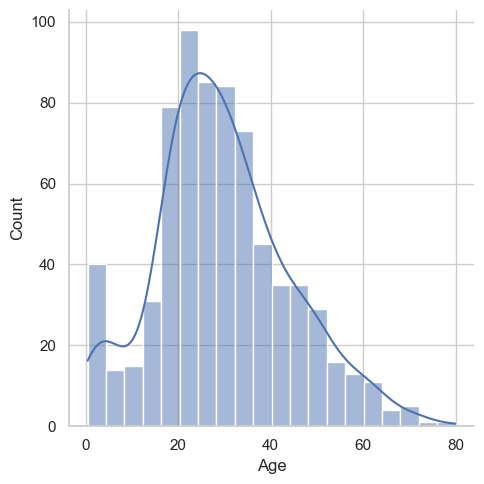

In [187]:
sns.displot(df[df['Age'].notnull()]['Age'],kde=True)

In [188]:
df["Age"] = df["Age"].interpolate()

In [189]:
len(df['Cabin'].unique())

148

In [190]:
df = df.drop("Cabin",axis=1)

In [191]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [192]:
df = df.drop(["PassengerId","Name","Ticket"],axis=1)

<AxesSubplot: xlabel='Pclass', ylabel='count'>

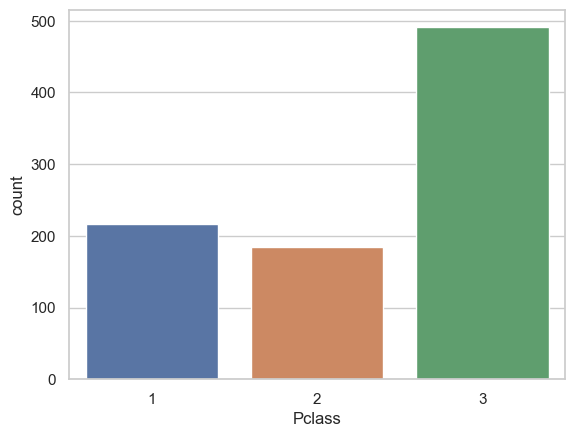

In [193]:
sns.countplot(data = df, x="Pclass")

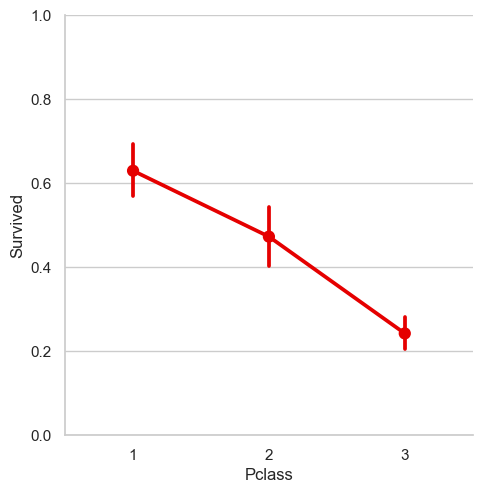

In [194]:
sns.set(style="whitegrid")
g = sns.PairGrid(data=df, x_vars=['Pclass'], y_vars='Survived', height=5)
g.map(sns.pointplot, color=sns.xkcd_rgb["red"])
g.set(ylim=(0, 1))

In [195]:
df["AgeBin"] = df["Age"].apply(lambda x: "Child" if x<=18 else ("Adult" if 18<x<=35 else "Old" if 35<x<=100 else "Old" ))
df = df.drop("Age",axis=1)

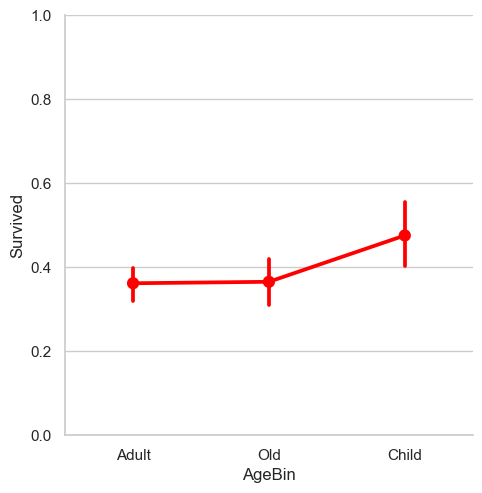

In [196]:
h = sns.PairGrid(data=df, x_vars=['AgeBin'], y_vars='Survived', height=5)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

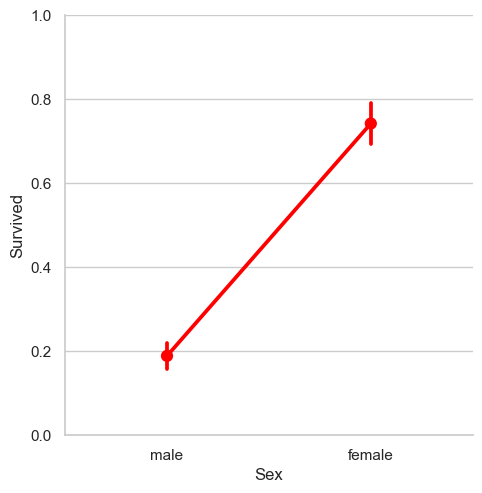

In [197]:
h = sns.PairGrid(data=df, x_vars=['Sex'], y_vars='Survived', height=5)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

In [198]:
df["Family"] = df["SibSp"] + df["Parch"]
df = df.drop(["SibSp","Parch"],axis=1)
df.head()

,Survived,Pclass,Sex,Fare,Embarked,AgeBin,Family
0,0,3,male,7.2500,S,Adult,1
1,1,1,female,71.2833,C,Old,1
2,1,3,female,7.9250,S,Adult,0
3,1,1,female,53.1000,S,Adult,1
4,0,3,male,8.0500,S,Adult,0


In [199]:
df["isAlone"] = df["Family"].apply(lambda x: 1 if x==0 else 0)
df["isFemale"] = df["Sex"].apply(lambda x: 1 if x=="female" else 0)
df = df.drop("Sex",axis=1)
df.head()

,Survived,Pclass,Fare,Embarked,AgeBin,Family,isAlone,isFemale
0,0,3,7.2500,S,Adult,1,0,0
1,1,1,71.2833,C,Old,1,0,1
2,1,3,7.9250,S,Adult,0,1,1
3,1,1,53.1000,S,Adult,1,0,1
4,0,3,8.0500,S,Adult,0,1,0


In [200]:
df_final = pd.get_dummies(df,prefix = "is_")
df_final.head()

,Survived,Pclass,Fare,Family,isAlone,isFemale,is__C,is__Q,is__S,is__Adult,is__Child,is__Old
0,0,3,7.2500,1,0,0,0,0,1,1,0,0
1,1,1,71.2833,1,0,1,1,0,0,0,0,1
2,1,3,7.9250,0,1,1,0,0,1,1,0,0
3,1,1,53.1000,1,0,1,0,0,1,1,0,0
4,0,3,8.0500,0,1,0,0,0,1,1,0,0


In [201]:
scaler = StandardScaler()
X,y = df_final.drop("Survived",axis=1),df_final["Survived"]
X_scaled = scaler.fit_transform(X)

In [202]:
X_scaled.shape

(891, 11)

In [203]:
train_x,test_x,train_y,test_y = train_test_split(X_scaled,y,train_size=0.8,test_size=0.2,stratify=y)

In [204]:
def dmp_classifier(model):
    classifier = model
    classifier.fit(train_x, train_y)
    return classifier

def dmp_scorer(model):
    score  = round(model.score(test_x, test_y)*100,2)
    y_pred = model.predict(test_x)
    precision = metrics.precision_score(test_y,y_pred)
    recall = metrics.recall_score(test_y,y_pred)
    f1 = metrics.f1_score(test_y,y_pred)
    return score,precision,recall,f1

In [205]:
model_list = [LogisticRegression(max_iter=1000), SVC(), LinearSVC(max_iter=1000),KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(n_estimators=100), GaussianNB(),Perceptron(), SGDClassifier(),GradientBoostingClassifier(),XGBClassifier(),LGBMClassifier()]

In [206]:
model_classifiers = [dmp_classifier(x) for x in model_list]

c:\Users\yomaa\Documents\Github\University-of-Chicago\Environment\uchicago_venv\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [207]:
scores = [dmp_scorer(x) for x in model_classifiers]
acc_scores = [x[0] for x in scores]
pre_scores = [x[1] for x in scores]
rec_scores = [x[2] for x in scores]
f1_scores = [x[3] for x in scores]


In [208]:
clf = LogisticRegression()
clf.fit(train_x, train_y)
y_pred_log_reg = clf.predict(test_x)
acc_log_reg = round( clf.score(test_x, test_y) * 100, 2)
print (str(acc_log_reg) + ' percent')

81.56 percent


In [209]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Decent',"Gradient Booser","xTreme Gradient Booster(XGBoost)","Light Gradient Booster (LGBMBoost)"],
    
    'Accuracy': acc_scores,
    'Precision': pre_scores,
    'Recall': rec_scores,
    'F1': f1_scores,
    })

models.sort_values(by=['F1',"Accuracy"], ascending=False)

,Model,Accuracy,Precision,Recall,F1
11,Light Gradient Booster (LGBMBoost),82.68,0.763889,0.797101,0.780142
8,Stochastic Gradient Decent,81.56,0.757143,0.768116,0.762590
1,Support Vector Machines,81.01,0.761194,0.739130,0.750000
9,Gradient Booser,80.45,0.742857,0.753623,0.748201
0,Logistic Regression,81.56,0.790323,0.710145,0.748092
2,Linear SVC,81.01,0.769231,0.724638,0.746269
3,KNN,79.89,0.732394,0.753623,0.742857
4,Decision Tree,80.45,0.793103,0.666667,0.724409
10,xTreme Gradient Booster(XGBoost),77.65,0.710145,0.710145,0.710145
6,Naive Bayes,78.77,0.803922,0.594203,0.683333


In [210]:
def operations(input_df):
    dfs = input_df.copy()
    dfs["Embarked"] = dfs["Embarked"].fillna("S")
    dfs["Age"] = dfs["Age"].interpolate()
    dfs["AgeBin"] = dfs["Age"].apply(lambda x: "Child" if x<=18 else ("Adult" if 18<x<=35 else "Old" if 35<x<=100 else "Old" ))
    dfs["Family"] = dfs["SibSp"] + dfs["Parch"]
    dfs["isAlone"] = dfs["Family"].apply(lambda x: 1 if x==0 else 0)
    dfs["isFemale"] = dfs["Sex"].apply(lambda x: 1 if x=="female" else 0)
    
    dfs = dfs.drop("Cabin",axis=1)
    dfs = dfs.drop(["PassengerId","Name","Ticket"],axis=1)
    dfs = dfs.drop(["SibSp","Parch"],axis=1)
    dfs = dfs.drop("Age",axis=1)
    dfs = dfs.drop("Sex",axis=1)
    
    dfs_final = pd.get_dummies(dfs,prefix = "is_")
    scaler = StandardScaler()
    Xs = dfs_final.drop("Survived",axis=1)
    Xs_scaled = scaler.fit_transform(Xs)
    return Xs_scaled

In [211]:
holdout = pd.read_csv("holdout_test.csv")
holdout.head()

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,NaN,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,NaN,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,NaN,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,NaN,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,NaN,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [212]:
holdout_scaled = operations(holdout)
lgbm_model = model_classifiers[11]
holdout_output = lgbm_model.predict(holdout_scaled)

In [215]:
holdout_output_df = pd.DataFrame(holdout_output,columns=["Survived"])
holdout_output_df.to_csv("Titanic_Results_from_12374398.csv")

## Choice Reasoning

I choose to go with an Light Gradient Boost Model, as it has the highest F1 Score, while having decent accuracy. This indicated that the model is neither over fitting nor under-fitting and predicting well. LGBM is also a very fast model ( especially when parallel processed) so it was better on time complexity when compared to other models.